In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplolib% inline
import seaborn as sns
# import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
train_df = pd.read_csv("2020_out_heading_matched_out.csv")

In [14]:
train_df.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRent,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.295846,-0.937159,-0.216342,-1.577553,-1.336384,1,1,1,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.731651,0.775301,-0.860445,1.384752,0.643917,1,1,1,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046002,0.340667,0.086206,1.033292,0.452275,1,0,0,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.456958,-1.219672,-0.503647,-1.527345,-1.911310,1,1,1,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.783229,2.570342,4.191641,1.284335,1.282724,0,0,0,0,0


In [11]:
train_df.shape

(50, 363)

In [10]:
test_df = pd.read_csv("2023_out_heading_matched_out.csv")
test_df.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRent,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.290011,-1.020961,-0.207013,-1.194113,-1.200626,1,1,1,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.728055,0.284112,-0.853351,1.323595,0.793232,1,1,1,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032041,1.068491,0.104547,0.963923,0.362128,0,0,1,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.452715,-1.184512,-0.505172,-0.834441,-1.739507,1,1,1,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.641701,2.350199,4.035256,1.143759,1.386001,0,0,0,0,0


In [12]:
test_df.shape

(50, 363)

In [16]:
# Train features
X_train = train_df.iloc[:,:-1].values

# Train target
y_train = train_df.iloc[:,-1].values

In [17]:
X_train.shape

(50, 362)

In [18]:
y_train.shape

(50,)

In [27]:
# Test features
X_test = test_df.iloc[:,:-1].values

# Test target
y_test = test_df.iloc[:,-1].values

In [28]:
X_test.shape

(50, 362)

In [29]:
y_test.shape

(50,)

In [25]:
# Creating the Adaboost Classifier
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1)

In [26]:
# Fit the model
ada_model = ada.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [30]:
# Predict with X_test
y_pred = ada_model.predict(X_test)

In [38]:
# Model evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.86
Precision: 0.90
Recall: 0.86
F1 Score: 0.86


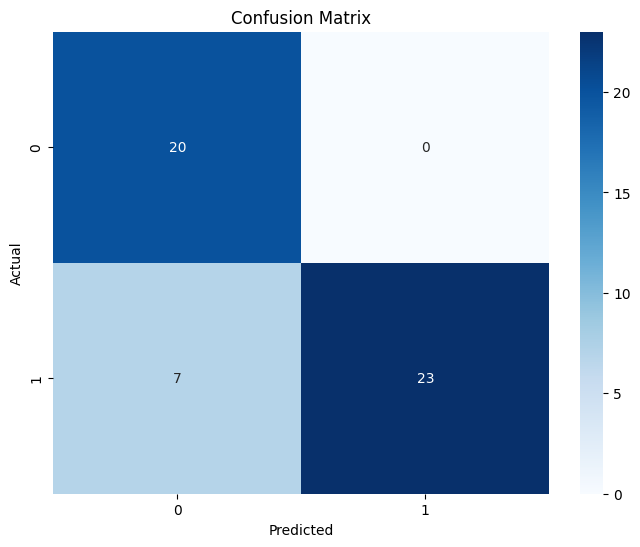

In [42]:
# Model evaluation
# Confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred)

# Confusion matrix plot
plt.figure(figsize=(8,6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=ada_model.classes_, yticklabels=ada_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(y_pred)

[1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 1 1 1 0 0 0 1 0 1]


In [45]:
train_df.columns

Index(['state_Alabama', 'state_Alaska', 'state_Arizona', 'state_Arkansas',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Delaware', 'state_Florida', 'state_Georgia',
       ...
       'GROSSRentOccupiedUnitsPayingRent',
       'GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_',
       'COMPUTERSAndInternetUseTotalHouseholds',
       'COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent',
       'COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent',
       'LastFourthElection_Republican', 'LastThirdElection_Republican',
       'LastSecondElection_Republican', 'LastElection_Republican', 'Target'],
      dtype='object', length=363)

In [ ]:
# swingstates = ['state_Arizona', 'state_Georgia', 'state_Michigan', 'state_Nevada', 'state_North Carolina', 'state_Pennsylvania', 'state_Wisconsin']

In [ ]:
# # 538
# ['state_Arizona 1', 'state_Georgia 1', 'state_Michigan 1', 'state_Nevada 1', 'state_North Carolina 1', 'state_Pennsylvania 1', 'state_Wisconsin 0']

In [ ]:
# Prediction
# ['state_Arizona 0', 'state_Georgia 0', 'state_Michigan 0', 'state_Nevada 0', 'state_North Carolina 0', 'state_Pennsylvania 0', 'state_Wisconsin 0']